## Hack.Diversity Data Interview: Product Inclusion Analysis Challenge

#  1- Retrieve and Inspect the Dataset

In [3]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


file_name = 'inclusive_features_usage1.csv'  
df = pd.read_csv(file_name)

In [4]:
df.head()

,user_id,feature_used,session_duration,engagement_score,accessibility_settings,age_group,gender,additional_attributes
0,user_4737,Multilingual,60.77,4,4,Teenager,NaN,LGBTQ+
1,user_1492,Text-to-Speech,20.20,5,4,Professional,Non-Binary,NaN
2,user_5936,Colorblind Mode,93.78,2,2,Adult,Female,NaN
3,user_5519,Colorblind Mode,26.36,3,1,Adult,NaN,LGBTQ+
4,user_1853,High Contrast Mode,91.67,5,1,Young Adult,Male,NaN


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 8 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   user_id                 10000 non-null  object 
 1   feature_used            10000 non-null  object 
 2   session_duration        10000 non-null  float64
 3   engagement_score        10000 non-null  int64  
 4   accessibility_settings  10000 non-null  int64  
 5   age_group               10000 non-null  object 
 6   gender                  6003 non-null   object 
 7   additional_attributes   3997 non-null   object 
dtypes: float64(1), int64(2), object(5)
memory usage: 625.1+ KB


# 2- Data Cleaning & Preparation

## Coverting objects to strings for ease-of-use

In [6]:
df['user_id'] = df['user_id'].astype('string')
df['feature_used'] = df['feature_used'].astype('string')
df['age_group'] = df['age_group'].astype('string')
df['gender'] = df['gender'].astype('string')
df['additional_attributes'] = df['additional_attributes'].astype('string')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 8 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   user_id                 10000 non-null  string 
 1   feature_used            10000 non-null  string 
 2   session_duration        10000 non-null  float64
 3   engagement_score        10000 non-null  int64  
 4   accessibility_settings  10000 non-null  int64  
 5   age_group               10000 non-null  string 
 6   gender                  6003 non-null   string 
 7   additional_attributes   3997 non-null   string 
dtypes: float64(1), int64(2), string(5)
memory usage: 625.1 KB


In [7]:
df.isnull().sum()

user_id                      0
feature_used                 0
session_duration             0
engagement_score             0
accessibility_settings       0
age_group                    0
gender                    3997
additional_attributes     6003
dtype: int64

In [8]:
df['gender'] = df['gender'].fillna('Prefer not to say')
df['gender'].value_counts()
df['gender'] = df['gender'].replace('Prefer not to say', 'Not Provided').astype('string')
df['gender'].value_counts()
df['gender'] = df['gender'].replace('Not Provided', 'Gender Not Provided').astype('string')
df['gender'].value_counts()

gender
Gender Not Provided    3997
Male                   2029
Female                 1990
Non-Binary             1984
Name: count, dtype: Int64

## Missing values in 'additional_attributes' column

In [9]:
df['additional_attributes'] = df['additional_attributes'].fillna('No Additional Attributes')
df['additional_attributes'].value_counts()

additional_attributes
No Additional Attributes    6003
Person of Color             2018
LGBTQ+                      1979
Name: count, dtype: Int64

In [10]:
df.isnull().sum()

user_id                   0
feature_used              0
session_duration          0
engagement_score          0
accessibility_settings    0
age_group                 0
gender                    0
additional_attributes     0
dtype: int64

In [11]:
df.describe()

,session_duration,engagement_score,accessibility_settings
count,10000.000000,10000.00000,10000.000000
mean,62.443799,3.04360,2.489600
std,33.522672,1.41778,1.707332
min,5.010000,1.00000,0.000000
25%,33.070000,2.00000,1.000000
50%,63.175000,3.00000,2.000000
75%,91.600000,4.00000,4.000000
max,120.000000,5.00000,5.000000


## Outliers

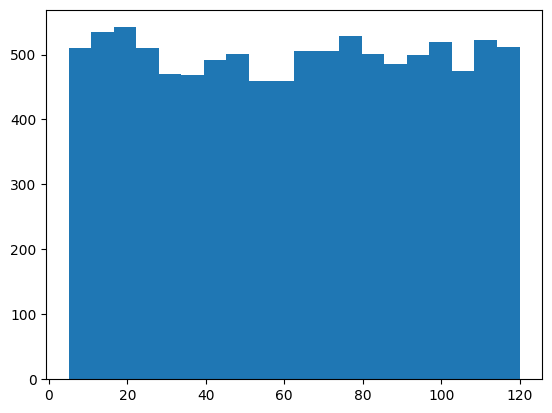

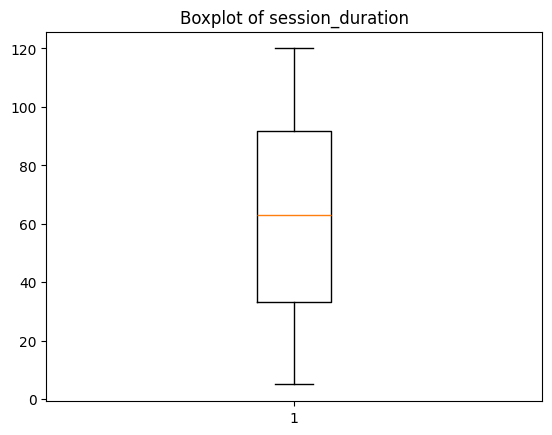

Empty DataFrame
Columns: [user_id, feature_used, session_duration, engagement_score, accessibility_settings, age_group, gender, additional_attributes]
Index: []


In [12]:
# session duration

plt.hist(df['session_duration'], bins=20)
plt.show()
plt.boxplot(df['session_duration'])
plt.title('Boxplot of session_duration')
plt.show()

###########################################
Q1_session_duration = df['session_duration'].quantile(0.25)
Q3_session_duration = df['session_duration'].quantile(0.75)
IQR_session_duration = Q3_session_duration - Q1_session_duration
lower_session_duration = Q1_session_duration - (1.5 * IQR_session_duration)
upper_session_duration = Q3_session_duration + (1.5 * IQR_session_duration)
outliers_session_duration = df[(df['session_duration'] < lower_session_duration) | (df['session_duration'] > upper_session_duration)]
print(outliers_session_duration)

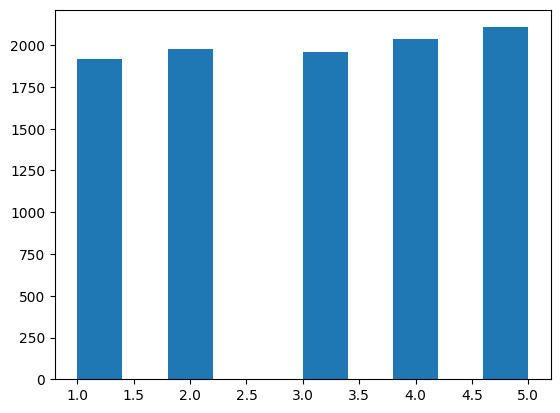

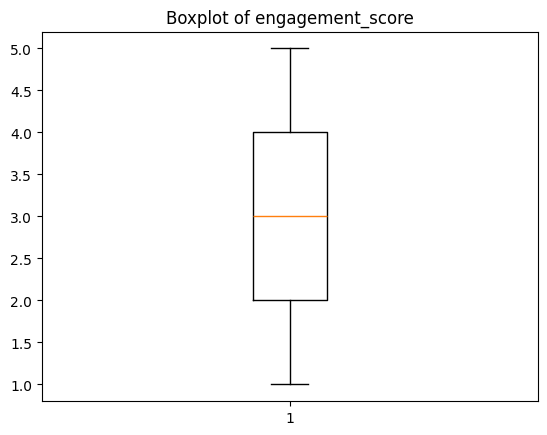

Empty DataFrame
Columns: [user_id, feature_used, session_duration, engagement_score, accessibility_settings, age_group, gender, additional_attributes]
Index: []


In [13]:
# engagement score
plt.hist(df['engagement_score'])
plt.show()
plt.boxplot(df['engagement_score'])
plt.title('Boxplot of engagement_score')
plt.show()
###########################################
Q1_engagement_score = df['engagement_score'].quantile(0.25)
Q3_engagement_score = df['engagement_score'].quantile(0.75)
IQR_engagement_score = Q3_engagement_score - Q1_engagement_score
lower_engagement_score = Q1_engagement_score - (1.5 * IQR_engagement_score)
upper_engagement_score = Q3_engagement_score + (1.5 * IQR_engagement_score)
outliers_engagement_score = df[(df['engagement_score'] < lower_engagement_score) | (df['engagement_score'] > upper_engagement_score)]
print(outliers_engagement_score)

I chose not to omit any 'outliers' in both the session duration and egagement score columns, as no values fall below the lower bound or above the upper bound as detemined by the interquartile range

## High Accessibility User Classification

high_accessibility_user
0    5035
1    4965
Name: count, dtype: int64


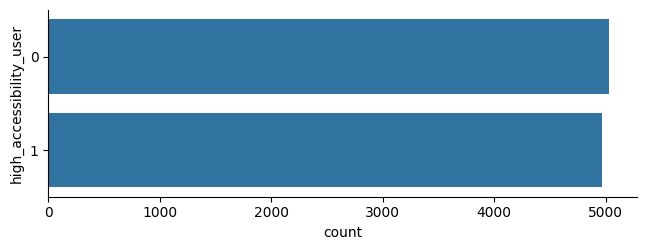

In [14]:
df['high_accessibility_user'] = [1 if x >= 3 else 0 for x in df['accessibility_settings'] ]
print(df['high_accessibility_user'].value_counts())
high_accessibility_user = sns.catplot(y="high_accessibility_user", kind="count", data=df, height=2.6, aspect=2.5)

I chose to impute 1s and 0s for the high_accessibility_user column because most ML models, such as linear/logistic regression work better with numeric values over boolean values. It is also easy to interpret that a '1' in the column means that the user is classed as high accessibility, and a '0' means that the user is not classed as high accessibility.

## Intersectionality Analysis - demographics column

In [15]:
df['demographics'] = df['age_group'] + '-' + df['gender'] + '-' + df['additional_attributes']
df['demographics'].head(10)
df.head()

,user_id,feature_used,session_duration,engagement_score,accessibility_settings,age_group,gender,additional_attributes,high_accessibility_user,demographics
0,user_4737,Multilingual,60.77,4,4,Teenager,Gender Not Provided,LGBTQ+,1,Teenager-Gender Not Provided-LGBTQ+
1,user_1492,Text-to-Speech,20.20,5,4,Professional,Non-Binary,No Additional Attributes,1,Professional-Non-Binary-No Additional Attributes
2,user_5936,Colorblind Mode,93.78,2,2,Adult,Female,No Additional Attributes,0,Adult-Female-No Additional Attributes
3,user_5519,Colorblind Mode,26.36,3,1,Adult,Gender Not Provided,LGBTQ+,0,Adult-Gender Not Provided-LGBTQ+
4,user_1853,High Contrast Mode,91.67,5,1,Young Adult,Male,No Additional Attributes,0,Young Adult-Male-No Additional Attributes


In [16]:
df['demographics'].value_counts()

demographics
Adult-Non-Binary-No Additional Attributes           431
Adult-Male-No Additional Attributes                 426
Senior-Male-No Additional Attributes                420
Professional-Male-No Additional Attributes          417
Young Adult-Female-No Additional Attributes         414
Professional-Gender Not Provided-Person of Color    411
Senior-Gender Not Provided-LGBTQ+                   411
Young Adult-Gender Not Provided-Person of Color     410
Senior-Gender Not Provided-Person of Color          408
Senior-Female-No Additional Attributes              406
Teenager-Gender Not Provided-Person of Color        405
Adult-Gender Not Provided-LGBTQ+                    402
Young Adult-Non-Binary-No Additional Attributes     401
Teenager-Gender Not Provided-LGBTQ+                 396
Professional-Female-No Additional Attributes        394
Young Adult-Gender Not Provided-LGBTQ+              392
Adult-Female-No Additional Attributes               392
Professional-Non-Binary-No Addition

The site is most commonly used by Non-Binary Adults, and least commonly used by Young Adult Males